# Import Required Libraries

In [166]:
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
import random

# Bootstrap Implementations

In [167]:
def row_bootstrap(df, n_samples, sizes=None):

    if sizes is None:
        sizes = df.shape

    n_rows, n_columns = sizes

    bootstrapped_results = np.zeros((n_samples, n_rows, n_columns))

    for n in range(n_samples):
        bootstrapped_results[n, :, :] = \
            df.sample(n=n_rows, replace=True, axis='rows').\
            sample(n=n_columns, axis='columns')

    return bootstrapped_results


def pair_bootstrap(df, n_samples, sizes=None):

    if sizes is None:
        n_rows, size = df.shape

    corr_matrices = np.ones((n_samples, size, size))

    for n in range(n_samples):
        for i in range(size):
            for j in range(i):
                corr_i_j = df.iloc[:, [i, j]].\
                    sample(n=n_rows, axis='rows', replace=True).\
                    corr().values[0, 1]
                    
                corr_matrices[n, i, j] = corr_i_j
                corr_matrices[n, j, i] = corr_i_j

    return corr_matrices


def block_bootstrap(df, n_samples, block_size, sizes=None,):
    
    if sizes is None:
        sizes = df.shape

    n_rows, n_columns = sizes
    b_height, b_width = block_size 
    
    block_rows = [k * b_height for k in range(n_rows // b_height)]
    block_columns = [k * b_width for k in range(n_columns // b_width)]
    
    # print(blockـrows)
    # print(block_columns)
    
    bootstrapped_results = np.zeros((n_samples, *sizes))
    
    for n in range(n_samples):
        for start_column in block_columns:
            end_column = start_column + b_width
            columns_df = df.iloc[:, start_column:end_column]

            for start_row in block_rows:
                end_row = start_row + b_height
                
                random_start_row = random.choice(block_rows)
                random_end_row = random_start_row + b_height
                
                random_block = columns_df.iloc[random_start_row:random_end_row,:].to_numpy()
                
                bootstrapped_results[n, start_row:end_row, start_column:end_column] = random_block
                
    return bootstrapped_results
        

# Download Stock Prices Data

In [168]:
assets = ["AAPL", "MSFT", "AMZN", "FB", "GOOG",
          "GLD", "SLV", "SPLV", "TLT", "SHY",
          "EWZ", "EWI", "EWJ", "EWG", "EWW"]

returns = yf.download(tickers=" ".join(assets), period="1y")["Close"].pct_change().iloc[1:,:]

# to percentage
returns *= 100

returns

[*********************100%***********************]  15 of 15 completed


,AAPL,AMZN,EWG,EWI,EWJ,EWW,EWZ,FB,GLD,GOOG,MSFT,SHY,SLV,SPLV,TLT
Date,,,,,,,,,,,,,,,
2021-04-20,-1.282999,-1.106760,-1.474749,-2.162493,-2.164815,-0.086424,-0.708818,0.135655,0.355655,-0.380908,-0.185507,0.023185,-0.083405,0.382377,0.460895
2021-04-21,0.292990,0.819569,0.460564,0.820967,0.855586,1.362451,0.228435,-0.389887,0.991116,-0.014817,0.898311,0.023188,3.088488,0.414044,0.200716
2021-04-22,-1.168537,-1.575838,-0.200572,-0.438457,0.175508,0.170689,0.854710,-1.641958,-0.648315,-1.106276,-1.308609,-0.011591,-1.983812,-0.362859,0.436400
2021-04-23,1.803854,0.962208,0.890030,1.258250,0.890642,0.702871,0.395478,1.554707,-0.383141,2.089145,1.547607,-0.023176,-0.289135,0.182090,-0.235061
2021-04-26,0.297792,2.038987,0.170750,0.403855,-0.376269,-0.634516,0.731565,0.634279,0.264425,0.494102,0.153166,-0.023191,0.662800,-0.561798,-0.142794
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-04-11,-2.551588,-2.161395,-1.263996,-0.377354,-1.564867,0.150493,-0.686746,-2.640217,0.495946,-3.144531,-3.943156,0.024084,1.446100,-0.754931,-1.582483
2022-04-12,1.152340,-0.221342,-1.024143,-0.964190,-1.316240,-0.225400,-0.132977,-1.071795,0.767675,-1.095559,-1.121788,0.252767,1.382288,-0.117030,-0.138053
2022-04-13,1.634254,3.152452,0.997784,1.529904,1.437731,0.715363,0.133154,0.396939,0.478854,1.489002,1.971211,0.048026,1.193015,0.205037,0.203302


# Row Bootstrap

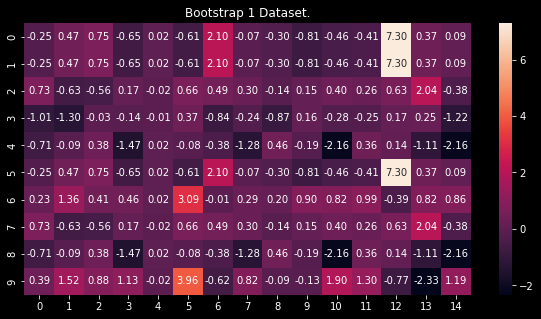

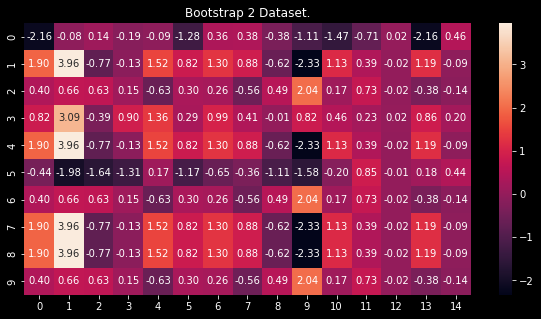

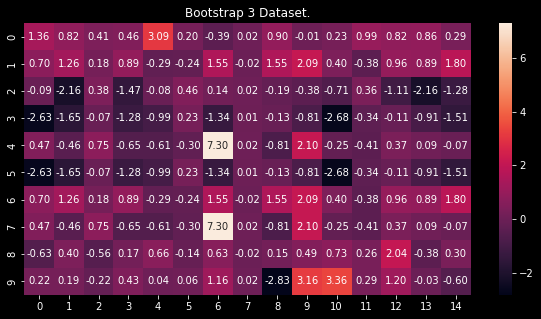

In [169]:
T = 10

original_dataset_df = returns[:T]

bootstraped_dataset_list = row_bootstrap(original_dataset_df, 3)

for index, bs_dataset in enumerate(bootstraped_dataset_list):
    plt.figure(figsize=(10, 5))
    sns.heatmap(bs_dataset, annot=True, fmt=".2f")
    plt.title(f'Bootstrap {index + 1} Dataset.')


# Pair Bootstrap

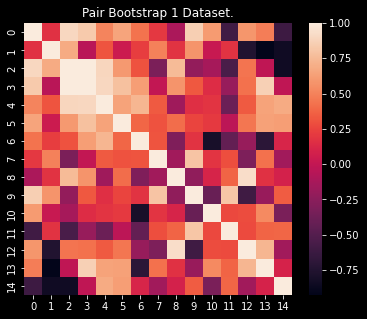

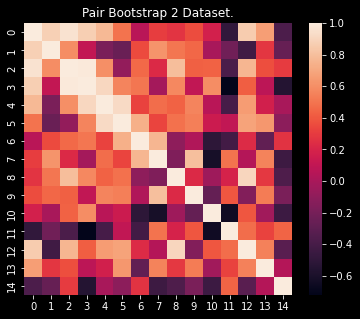

In [170]:
T = 10

original_dataset_df = returns[:T]

bootstraped_dataset_list = pair_bootstrap(original_dataset_df, 2)

for index, bs_dataset in enumerate(bootstraped_dataset_list):
    plt.figure(figsize=(6, 5))
    sns.heatmap(bs_dataset, )
    plt.title(f'Pair Bootstrap {index + 1} Dataset.')

# Block Bootstrap

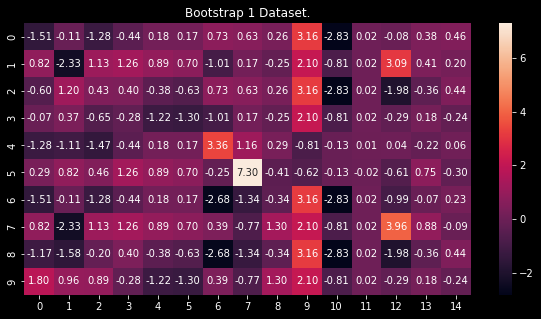

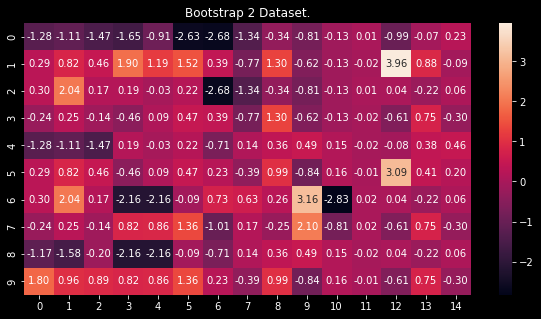

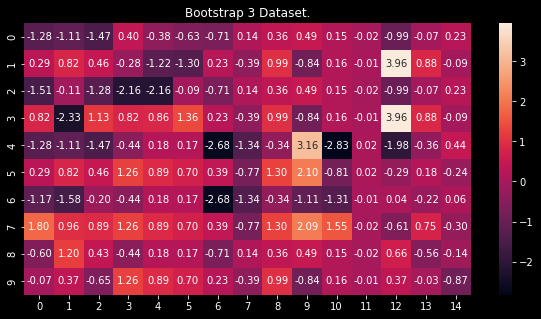

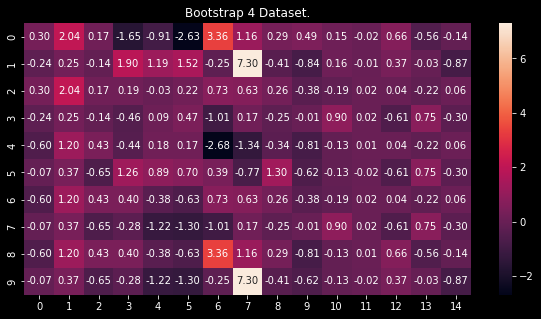

In [171]:
T = 10

original_dataset_df = returns[:T]

bootstraped_dataset_list = block_bootstrap(original_dataset_df, n_samples=4, block_size=(2, 3))


for index, bs_dataset in enumerate(bootstraped_dataset_list):
    plt.figure(figsize=(10, 5))
    sns.heatmap(bs_dataset, annot=True, fmt=".2f")
    plt.title(f'Bootstrap {index + 1} Dataset.')

